In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_moons, fetch_20newsgroups
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns

# Logistic Regression

In this section, we will implement the Logistic Regression algorithm from scratch using **Gradient Descent** to minimize the binary cross-entropy loss.

## Logistic Regression Formula:

- Logistic Regression predicts a probability $( P(y=1|X) )$ using the sigmoid function:
$$
  [
  h_{\theta}(X) = \frac{1}{1 + e^{-\theta^T X}}
  ]
$$
- The **loss function** for Logistic Regression (binary cross-entropy loss) is:
$$
  [
  J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
  ]
$$

In [2]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        theta -= (alpha / m) * (X.T @ (sigmoid(X @ theta) - y))
        costs.append(compute_cost(X, y, theta))
    return theta, costs

# Generate some binary classification data
np.random.seed(42)
X = np.random.randn(100, 2)
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept
y = (X[:, 1] + X[:, 2] > 0).astype(int).reshape(-1, 1)  # Linearly separable labels

# Initialize theta
theta_init = np.zeros((X.shape[1], 1))

# Train Logistic Regression with Gradient Descent
theta, costs = gradient_descent(X, y, theta_init, alpha=0.01, iterations=10000)
print("Learned parameters (theta):", theta.ravel())

# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

# Accuracy of predictions
preds = predict(X, theta)
accuracy = np.mean(preds == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Learned parameters (theta): [-0.17466043  3.73161667  3.74056214]
Accuracy: 99.00%


## Logistic Regression with Scikit-learn

Use scikit-learn’s `LogisticRegression` to replicate the results obtained from the manual implementation.

In [3]:
# Using scikit-learn's Logistic Regression
model = LogisticRegression(fit_intercept=True, solver='lbfgs')
model.fit(X[:, 1:], y.ravel())  # Omit the intercept column since fit_intercept is True

# Predict and compare results
y_pred = model.predict(X[:, 1:])
accuracy_sklearn = accuracy_score(y, y_pred) * 100
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}%")

# Compare learned parameters
print("Learned parameters (scikit-learn):", model.intercept_, model.coef_)

Accuracy (scikit-learn): 99.00%
Learned parameters (scikit-learn): [-0.189114] [[2.61574881 2.66418066]]


## Polynomial Logistic Regression and Regularization

Implement **Polynomial Logistic Regression** and apply **Regularization** (Ridge/Lasso) to prevent overfitting.
- Use scikit-learn’s `PolynomialFeatures` to create polynomial terms (e.g., quadratic terms for each feature).

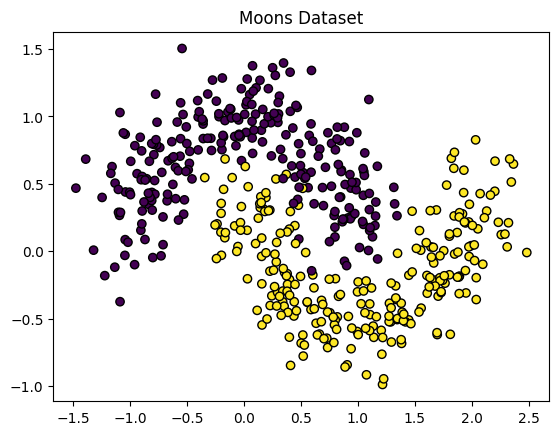

In [27]:
# Generate non-linear dataset (moons)
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Moons Dataset")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy with Logistic Regression: 86.67%
Accuracy with Polynomial Logistic Regression: 97.33%


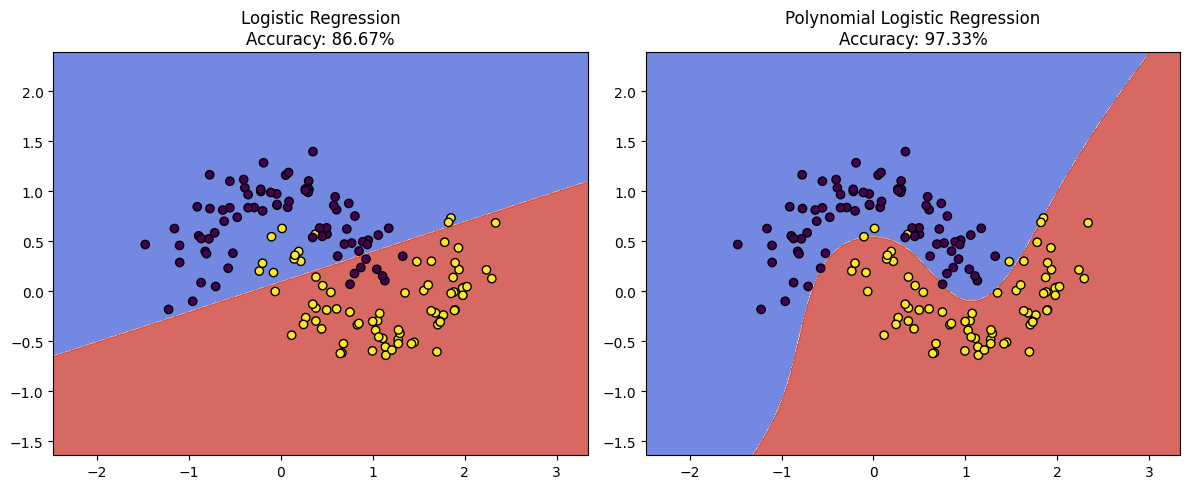

In [28]:
# Standard Logistic Regression (without polynomial features)
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Polynomial Logistic Regression
poly = PolynomialFeatures(degree=5) # Todo: try to fine-tune
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LogisticRegression()
model_poly.fit(X_train_poly, y_train)

# Predictions and Accuracy
y_pred_lr = model_lr.predict(X_test)
y_pred_poly = model_poly.predict(X_test_poly)

accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
accuracy_poly = accuracy_score(y_test, y_pred_poly) * 100

print(f"Accuracy with Logistic Regression: {accuracy_lr:.2f}%")
print(f"Accuracy with Polynomial Logistic Regression: {accuracy_poly:.2f}%")

# Plot decision boundaries

def plot_decision_boundary(model, X, y, poly=None, ax=None, title="Decision Boundary"):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # If PolynomialFeatures is used, transform the mesh grid
    if poly is not None:
        X_grid = poly.transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        X_grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict using the model
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')
    ax.set_title(title)

# Plot the decision boundary for standard Logistic Regression
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
plot_decision_boundary(model_lr, X_test, y_test, ax=ax1, title=f"Logistic Regression\nAccuracy: {accuracy_lr:.2f}%")

# Plot the decision boundary for Polynomial Logistic Regression
ax2 = plt.subplot(1, 2, 2)
plot_decision_boundary(model_poly, X_test, y_test, poly=poly, ax=ax2, title=f"Polynomial Logistic Regression\nAccuracy: {accuracy_poly:.2f}%")

plt.tight_layout()
plt.show()


### Regularization:

- Introduce **Ridge (L2)** and **Lasso (L1)** regularization to avoid overfitting when using high-degree polynomial features.
- In scikit-learn, this can be controlled with the `C` parameter (inverse of regularization strength).

In [39]:
# Ridge (L2) Regularization
model_ridge = LogisticRegression(penalty='l2', C=3)  # C is the inverse of lambda
model_ridge.fit(X_train_poly, y_train.ravel())
print(f"Accuracy with Ridge Regularization: {accuracy_score(y_test, model_ridge.predict(X_test_poly)) * 100:.2f}%")

# Lasso (L1) Regularization
model_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=3)
model_lasso.fit(X_train_poly, y_train.ravel())
print(f"Accuracy with Lasso Regularization: {accuracy_score(y_test, model_lasso.predict(X_test_poly)) * 100:.2f}%")

Accuracy with Ridge Regularization: 98.00%
Accuracy with Lasso Regularization: 98.67%


# Real Dataset

Apply Logistic Regression to the **20 Newsgroups** dataset, which is commonly used for text classification.


In [43]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all')

# Todo: encode the data from text to vectors
X = newsgroups.data
y = newsgroups.target

vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Apply Logistic Regression on your features
model_news = LogisticRegression()
model_news.fit(X_train, y_train)

LogisticRegression()

Accuracy on 20 Newsgroups: 88.43%

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.90      0.89       236
           comp.graphics       0.77      0.83      0.80       287
 comp.os.ms-windows.misc       0.81      0.84      0.83       290
comp.sys.ibm.pc.hardware       0.72      0.73      0.72       285
   comp.sys.mac.hardware       0.86      0.84      0.85       312
          comp.windows.x       0.89      0.84      0.86       308
            misc.forsale       0.82      0.80      0.81       276
               rec.autos       0.91      0.90      0.91       304
         rec.motorcycles       0.95      0.95      0.95       279
      rec.sport.baseball       0.93      0.96      0.95       308
        rec.sport.hockey       0.95      0.97      0.96       309
               sci.crypt       0.98      0.94      0.96       290
         sci.electronics       0.80      0.86      0.83       304
                 

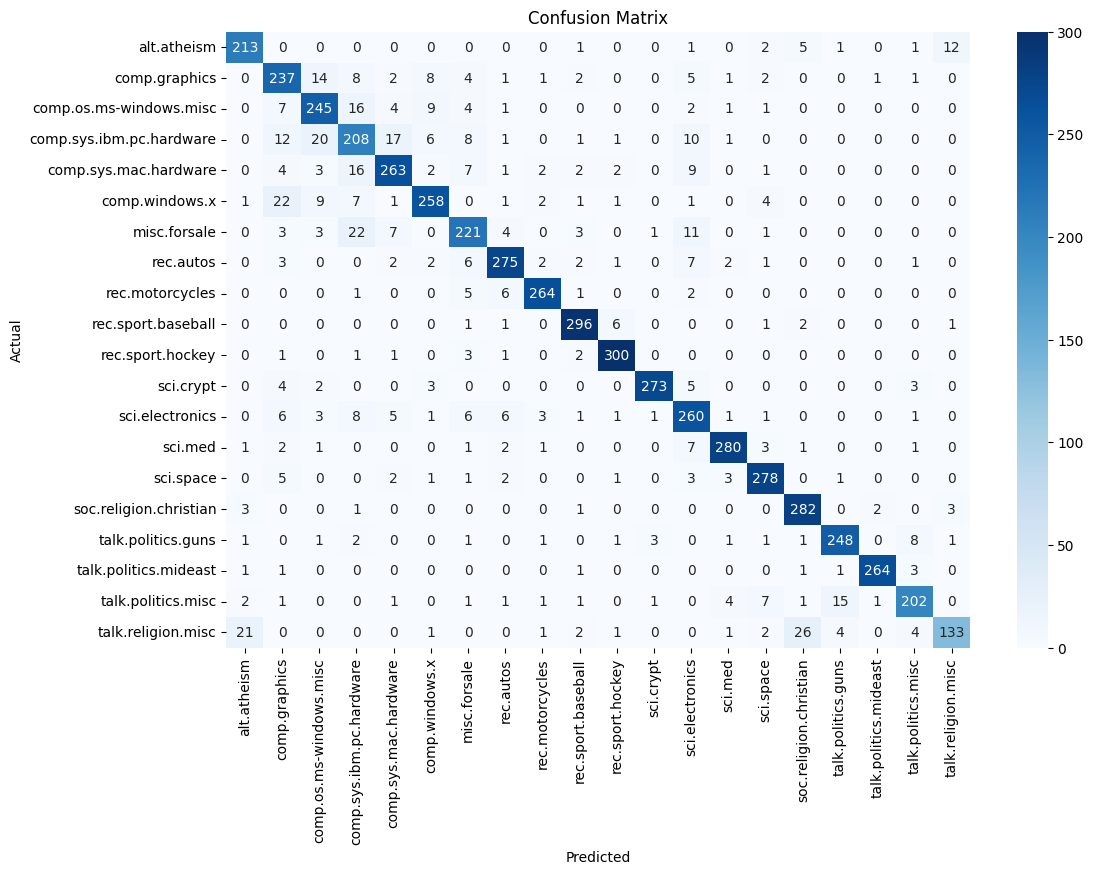

In [45]:
# Evaluate the model
y_pred_news = model_news.predict(X_test)
accuracy_news = accuracy_score(y_test, y_pred_news)
print(f"Accuracy on 20 Newsgroups: {accuracy_news * 100:.2f}%")

# Classification report
class_names = newsgroups.target_names
print("\nClassification Report:")
print(classification_report(y_test, y_pred_news, target_names=class_names))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_news)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()